# Randgold Resources Limited (GOLD)
NYSE - NYSE Delayed Price. Currency in USD

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
from scipy.stats import boxcox
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
df = pd.read_csv('Gold.csv', parse_dates= True, index_col=0)
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900


### Problem Definition

This porject is about on a trading strategy using unpredictable Gold data since 2000. Since 200 Gold stock has gone through a range of market conditions combining worldwide economic depression, sub-prime crisis in USA etc. 

This strategiy is likely to be successful in long term and based on a mix of technical and fundamental factors. A  combination of strategies used (Fibonacci Retracement, Exponential weighted Moving Average crossover strategy, Backtest and Monte-Carlo simulations) used in this project.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4883 entries, 1999-12-31 to 2019-05-30
Data columns (total 6 columns):
Open         4883 non-null float64
High         4883 non-null float64
Low          4883 non-null float64
Close        4883 non-null float64
Adj Close    4883 non-null float64
Volume       4883 non-null int64
dtypes: float64(5), int64(1)
memory usage: 267.0 KB


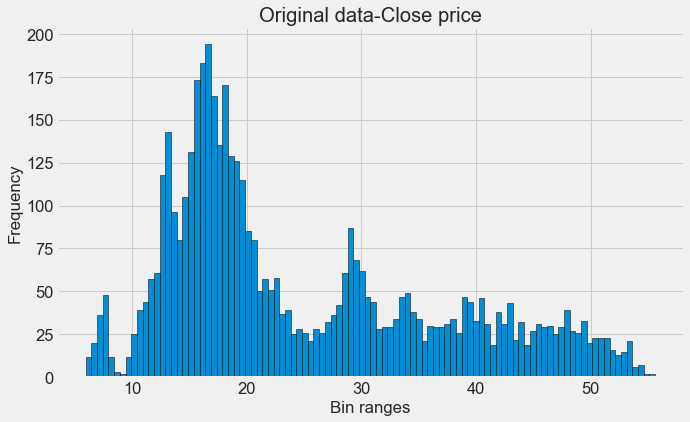

In [4]:
# Histogram of the Energy Star Score
rcParams['figure.figsize']=10,6
plt.style.use('fivethirtyeight')
plt.hist(df['Close'], bins = 100, edgecolor = 'k');
plt.xlabel('Bin ranges'); plt.ylabel('Frequency'); 
plt.title('Original data-Close price');

#### Above plot clearly shows the frequency range upto 200 (apprx) and majority price ranges between $10 to $20. Have checked the minimum ($5.94) and maximum ($55.63) price to understand the actual range of prices.

In [5]:
price_min = df.Close.min() # minimum price
price_min

5.94

In [6]:
price_max = df.Close.max() # maximum price
price_max

55.630001

In [7]:
from matplotlib import style
import mpl_finance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import num2date
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Candlestick plot- data visualization

Data has four variables involved for each date (open, high, low, and close), and we would like to have some visual way to see all four variables that does not require plotting four separate lines.

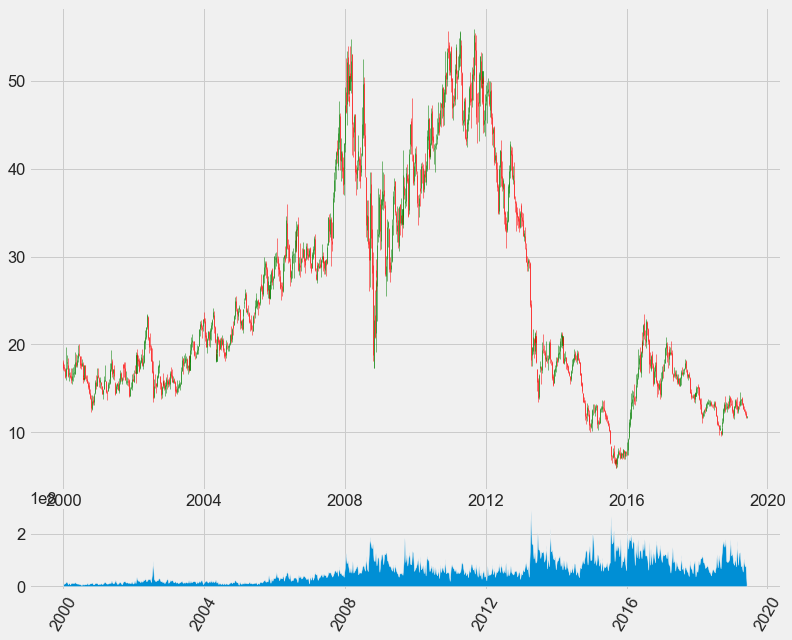

In [8]:
rcParams['figure.figsize'] = (12, 10)   # Change the size of plots
ohlc_dict = {                                                                                                             
'Open':'first',                                                                                                    
'High':'max',                                                                                                       
'Low':'min',                                                                                                        
'Close': 'last',                                                                                                    
'Volume': 'sum'
}

df.resample('5T', closed='left', label='left').apply(ohlc_dict)

df_ohlc = df.resample('10D', closed='left', label='left').apply(ohlc_dict)
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_volume = df['Volume'].resample('10D', closed='left', label='left').sum()

plt.style.use('fivethirtyeight')
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, colorup='g', colordown='r')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume,0)
plt.xticks(rotation=60)
plt.show()    


##### In above candlestick chart, the black candlestick indicate the day where the closing price was higher than the open (a gain), while a red candlestick indicates a day where the open was higher than the close (a loss). The wicks indicate the High and the Low, and the body the Open and Close (hue is used to determine which end of the body is the Open and which the Close). As seen from the graph, there is substantial upward movement in the price during 2006-2008 and 2009-2010. 

### Technical Analysis- Fibonacci Retracement 

Technical analysis was performed using Fibonacci Retracement by drawing two significant price points between High and Low and creating the levels between those two points. This has helpd to predict how far a Gold price will breakout or breakdown.

The most popular Fibonacci Retracements are 78.6%, 61.8% and 38.2%. These ratios are applied for time series analysis to find support level. 

using simple math-
            - Total up move = $55.63 - $5.94 = $49.69
            - 38.2% of up move = 38.2% * 49.69 = $18.98
            - Retracement forecast = $55.63 - $18.88 = $36.64
            
Whenever the price moves substantially upwards or downwards, it usually tends to retrace back before it continues to move in the original direction. For example, Gold price has moved from $5.94 to $55.63, then it is likely to retrace back to $36.64   before it continues to move upward. Any price level below $36.64 provides a good opportunity for the traders to enter into new positions in the direction of the trend. Likewise, calculated for 62.8% and 78.6% .
            
            - 61.8% of up move = 61.8% * 49.69 = 30.70%
            - Retracement forecast = $55.63 - $30.70 = $24.93
            
            - 78.6% of up move = 78.6% * 49.69 = 39.05%
            - Retracement forecast = $55.63 - $30.05 = $16.57

Level Price
0  55.630001
0.382 36.648420618
0.618 24.921580382
0.786 16.573660213999993
1  5.94


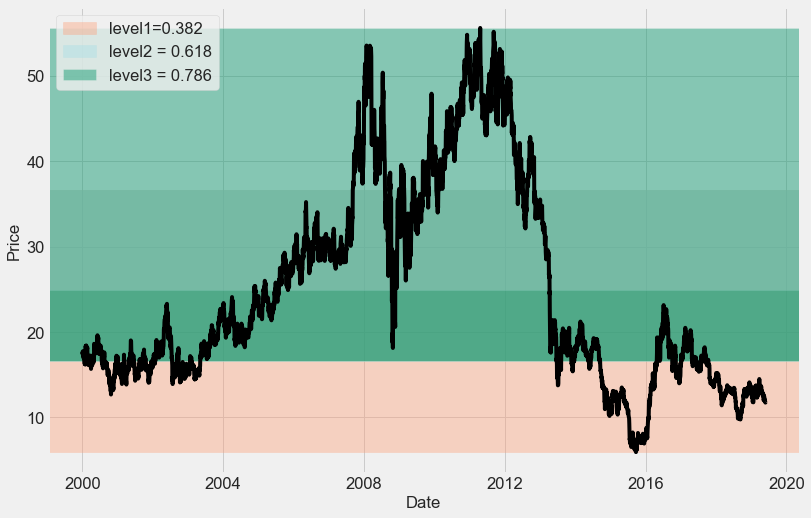

In [9]:
# Fibonacci Levels considering original trend as upward move

rcParams['figure.figsize'] = (12, 8)   # Change the size of plots
diff = price_max - price_min
level1 = price_max - 0.382 * diff
level2 = price_max - 0.618 * diff
level3 = price_max - 0.786 * diff


print ("Level", "Price")
print ("0 ", price_max)
print ("0.382", level1)
print ("0.618", level2)
print('0.786', level3)
print ("1 ", price_min)

ax = plt.gca()

ax.axhspan(level1, price_min, label= 'level1=0.382', alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, label= 'level2 = 0.618', color='powderblue')
ax.axhspan(level3, level2, alpha=0.5, label= 'level3 = 0.786')
ax.axhspan(price_max, level3, alpha=0.5)
plt.plot(df.Close, color = 'black')

plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc=2)
plt.show()


#### Exponential moving average (EMA) cross over trading strategy

I have used EMA to design a trading strategy.

Considering EMA lags the actual price behaviour, it can be assumed that, when a change in the long term behaviour of the Gold asset occurs, the original timeseries will react faster than the ewma one. Therefore, I will consider the crossing of the two lines as potential trading signals.

    - When the original timeseries p(t) crosses the ewma timeseries e(t) from below, it is advisable to close any existing 
      short position and go long (buy) one unit of the Gold asset.
    - When the price timeseries p(t) crosses the EMA timeseries e(t) from above, it is advisable to close any existing long 
      position and go short (sell) one unit of the Gold asset.

The price chart is over laid with two ewmas. The shorter ewma is faster to react, while the longer ewma is slower to react The outlook turns bullish when the faster ewma crosses and is above the slower ewma. 

                    EMA(t) = (1−α)EMA(t−1) + α p(t)
                    EMA(t0) = p(t0)
           
where p(t) is the price at time t and α is called the decay parameter for the EMA. α is related to the lag as
                    
                    α=1/L+1
 
and the length of the window (span) M as
                    
                    α=2/M+1

The window span in below plot are taken from Fibonacci numbers. It can be seen from below plot that,  233 days ema timeseries is much less noisy than 55 days timeseries. The 55-day ema is almost moving with original series. The crossing of ema lines indicate changes in trend and also indicate that the financial security is changing direction and a profitable trade might be made.

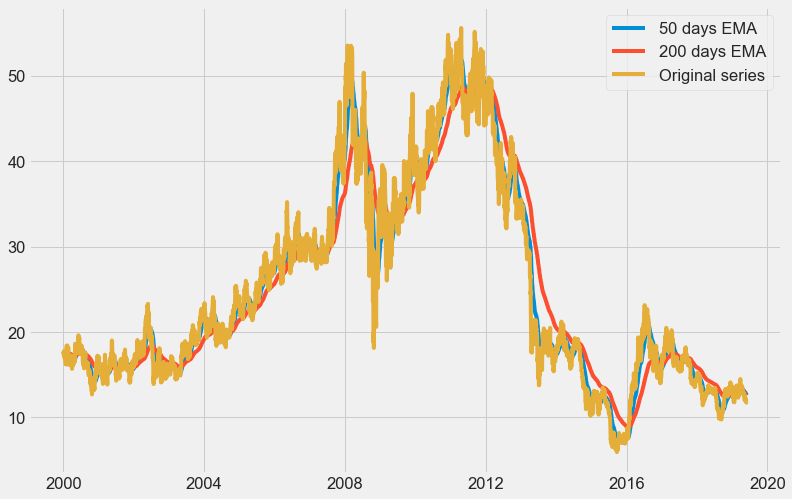

In [11]:
ema50 = df.Close.ewm(span=50, adjust=False).mean() # span= 50 taken a short window
ema200 = df.Close.ewm(span=200, adjust=False).mean() # span = 200 as per histogram above


plt.style.use('fivethirtyeight')
plt.plot(ema50, label= '50 days EMA')
plt.plot(ema200, label= '200 days EMA')
plt.plot(df.Close, label= 'Original series')
plt.legend(loc='best')

##### 200 days looks less noisy; 50 days window plot moving almost in-line with original plot

In [12]:
ema200.tail() # sanity check

Date
2019-05-23    12.837523
2019-05-24    12.828692
2019-05-28    12.817860
2019-05-29    12.807234
2019-05-30    12.797112
Name: Close, dtype: float64

In [13]:
df['ema50'] = ema50 # creating separate columns in original dataframe
df['ema200'] = ema200

In [14]:
# Taking the difference between the original price and the ema200 time series to determine trading position
trading_positions_raw = df.Close - df.ema200
trading_positions_raw.tail()

Date
2019-05-23   -0.877523
2019-05-24   -0.878692
2019-05-28   -1.077860
2019-05-29   -1.057234
2019-05-30   -1.007112
dtype: float64

In [15]:
# Taking the sign of the difference pi(t) and the EMA ei(t) to determine whether the original price or the EMA is greater

trading_positions = trading_positions_raw.apply(np.sign)
trading_positions.tail()

Date
2019-05-23   -1.0
2019-05-24   -1.0
2019-05-28   -1.0
2019-05-29   -1.0
2019-05-30   -1.0
dtype: float64

##### Considering the first day to when the original close price timeseries p(to) crosses above and EMA timeseries ei(to). Since p(to) > ei(to) therefore, at that point the trading weight wi(to) becomes positive, and thus according to this trading strategy, we need to set for that day wi(to)=1. p(to) is the price of the asset at the close of day (to). Thus, wait until the close of the trading day to know if  p(to) > ei(to). Therefore, lagging the trading positions by one day.

In [16]:
trading_final = trading_positions.shift(1)
trading_final.tail()

Date
2019-05-23   -1.0
2019-05-24   -1.0
2019-05-28   -1.0
2019-05-29   -1.0
2019-05-30   -1.0
dtype: float64

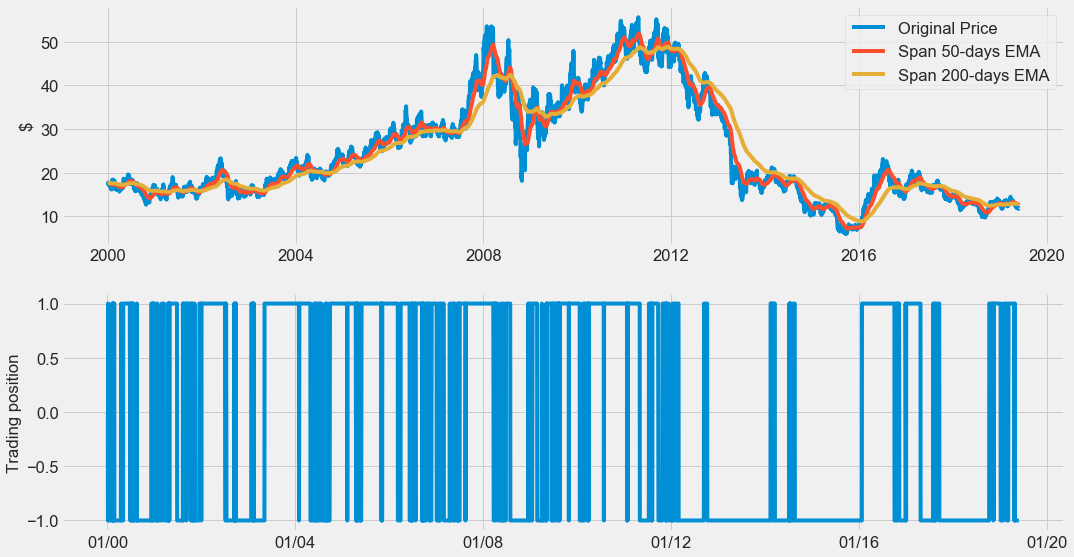

In [17]:
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')

# plotting the timeseries and the respective trading position
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9)) 

plt.style.use('fivethirtyeight')
ax1.plot(df.Close, label='Original Price')
ax1.plot(df.ema50, label = 'Span 50-days EMA')
ax1.plot(df.ema200, label = 'Span 200-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')


ax2.plot(trading_final, label='Trading position')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [18]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
close_log = np.log(df.Close).diff()
close_log.head()

Date
1999-12-31         NaN
2000-01-03    0.000000
2000-01-04   -0.014235
2000-01-05    0.017762
2000-01-06    0.000000
Name: Close, dtype: float64

In [19]:
strategy_returns = trading_final * close_log # To get all the strategy_returns for all days

# log-returns can be added to show performance across time, 
# so, plotted the cumulative log-returns and the cumulative total relative returns.
strategy_returns.tail()

Date
2019-05-23   -0.001674
2019-05-24    0.000836
2019-05-28    0.017729
2019-05-29   -0.000851
2019-05-30   -0.003398
dtype: float64

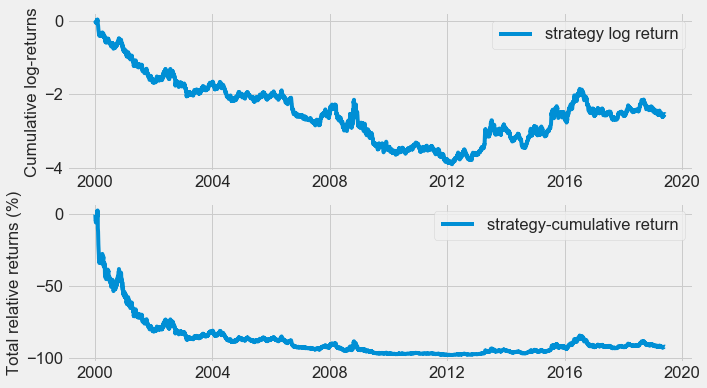

In [21]:
# Get the cumulative log-returns per asset
strategy_returns_cum = strategy_returns.cumsum()

# Transform the cumulative log returns to relative returns
strategy_returns_relative = np.exp(strategy_returns_cum) - 1

plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))

ax1.plot(strategy_returns_cum, label='strategy log return')
ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')


ax2.plot(100*strategy_returns_relative, label='strategy-cumulative return')
ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')


In [22]:
df['strategy_equity'] = strategy_returns_cum  # #set strategy starting equity to 1 (i.e. 100%) and generate equity curve
strategy_returns_cum.tail()

Date
2019-05-23   -2.558043
2019-05-24   -2.557207
2019-05-28   -2.539477
2019-05-29   -2.540328
2019-05-30   -2.543727
dtype: float64

In [23]:
df.head(10)  # sanity check to review dataframe object  

,Open,High,Low,Close,Adj Close,Volume,ema50,ema200,strategy_equity
Date,,,,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700,17.687500,17.687500,NaN
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900,17.687500,17.687500,0.000000
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100,17.677696,17.685012,0.000000
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100,17.680532,17.685659,-0.017762
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300,17.683256,17.686299,-0.017762
2000-01-07,17.8125,17.8750,17.2500,17.3125,13.806861,1199900,17.668716,17.682580,-0.042719
2000-01-10,17.4375,17.4375,17.2500,17.3125,13.806861,958200,17.654747,17.678898,-0.042719
2000-01-11,17.4375,17.8125,17.2500,17.6250,14.056086,1914500,17.653581,17.678361,-0.060609
2000-01-12,17.3750,17.5625,17.2500,17.3125,13.806861,936200,17.640205,17.674721,-0.042719


##### The rerurn strategy is based on cumulative log-returns of Gold price. Both the values (ema50 and ema200) can be compared cheking the columns. When the ema200 > ema50, the newly created column in the dataframe (trading_strategy) will be populated with a value of 1, otherwise this column will have a value of 0. New column doesn’t tell when the crossover actually occurs, which is when a signal will be generated. By continuing to examine the “trading_strategy” column, it can be seen that a change from 0 to 1 between rows corresponds to the ema50 crossing above the ema200 value, which matches the entry logic.

In [24]:
# start with a 50-200 day ema crossover 

df['signal'] = np.where(df['ema200'] > df['ema50'],1,0)

# Defined the output value as trading_strategy, which is a binary variable storing as 1 when the 
# closing price of tomorrow > today.

df # sanity check

,Open,High,Low,Close,Adj Close,Volume,ema50,ema200,strategy_equity,signal
Date,,,,,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700,17.687500,17.687500,NaN,0
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900,17.687500,17.687500,0.000000,0
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100,17.677696,17.685012,0.000000,1
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100,17.680532,17.685659,-0.017762,1
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300,17.683256,17.686299,-0.017762,1
2000-01-07,17.8125,17.8750,17.2500,17.3125,13.806861,1199900,17.668716,17.682580,-0.042719,1
2000-01-10,17.4375,17.4375,17.2500,17.3125,13.806861,958200,17.654747,17.678898,-0.042719,1
2000-01-11,17.4375,17.8125,17.2500,17.6250,14.056086,1914500,17.653581,17.678361,-0.060609,1
2000-01-12,17.3750,17.5625,17.2500,17.3125,13.806861,936200,17.640205,17.674721,-0.042719,1


Any row with a value of “1” in the “trading_strategy” column corresponds to a buy signal according to this strategy logic. I now have an algorithmic trading strategy that is generating trading signals. It can be seen that, in May, 2019, the algorithm has generated quite a few buy signals.

### Backtesting our Strategy

Backtesting has been conducted to assess the viability of this strategy by discovering how it would play out using historical data. This is the logical combination of the strategy with the data set. The data reflects a variety of market conditions since 2000 and thereby can better judge the results of the backtest.

In [25]:
import bt
# download data
data = bt.get('gold', start='2000-01-01', end = '2019-05-31')
ema50 = data.ewm(50).mean()
ema200 = data.ewm(200).mean()


In [26]:
# create our new strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

In [27]:
# create a backtest and run it
test = bt.Backtest(s, ema50)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

In [28]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, ema200)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

s2
0% [############################# ] 100% | ETA: 00:00:00

In [29]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                1999-12-30  1999-12-30
End                  2019-05-31  2019-05-31
Risk-free rate       0.00%       0.00%

Total Return         -10.06%     -7.25%
Daily Sharpe         -0.13       -0.23
Daily Sortino        -0.22       -0.36
CAGR                 -0.54%      -0.39%
Max Drawdown         -83.51%     -74.35%
Calmar Ratio         -0.01       -0.01

MTD                  -2.12%      -0.77%
3m                   0.24%       -0.76%
6m                   4.80%       -1.40%
YTD                  1.34%       -1.50%
1Y                   -3.70%      -10.12%
3Y (ann.)            -3.28%      2.21%
5Y (ann.)            -5.72%      -9.37%
10Y (ann.)           -7.83%      -7.97%
Since Incep. (ann.)  -0.54%      -0.39%

Daily Sharpe         -0.13       -0.23
Daily Sortino        -0.22       -0.36
Daily Mean (ann.)    -0.48%      -0.38%
Daily Vol (ann.)     3.62%       1.64%
Daily Skew           0.13        -0

#### Above statistics clearly suggests long-term investment plan fro Gold stock at least 1 year to avoid high volatility. Yearly volatility for min 200 days window is 18.84% considering historical data. This is in ine with Fibonacci retracement strategy which suggests ait for support level 2. The current price is at mid range of level1. In fact. from statistic above, with 200 days ema, +ve returns was observed 3 years ago (2.21%).

- Total Return: Total return on the period.
- Daily Sharpe: Daily Sharpe ratio
- The Sharpe ratio : S(x) = (Rx−r)/σx
 
- Rx = investment return, 
- r = riskfree rate and 
- σx = StdDev of the investment. 

The risk free rate is excluded here considering Sharpe ratio is usually not considered as a standalone; generally compared to other stocks. 

- The Sharpe ratio measures the return we are receiving in comparison with the risk taking.
- Daily Sortino: Daily Sortino ratio (considering -ve volatility); The formula is v : S′(x) = (Rx − r)/σx
- CAGR: Compound annual growth rate; CAGR(t0,tn) = (V(tn)/V(t0))1/tn-t0 − 1
- Max Drawdown: Maximum decline of the equity
- Calmar Ratio: Ratio of the CAGR and the absolute value of the Max Drawdown

- Daily Mean (ann.): Daily average of return, times the number of trading periods in a year (252)
- Daily Vol (ann.): Same thing with the StdDev
- Daily Skew: Usual measure of the asymmetry, daily average
- Daily Kurt: Usual measure of “tailedness”, daily average

- MTD: The month to date return
- 3m: 3 months ago to date return
- 6m: 6 months
- YTD: The beginning of the year to date return
- 1Y: One year ago to date return
- 3Y: Etc.
- 5Y: Etc.

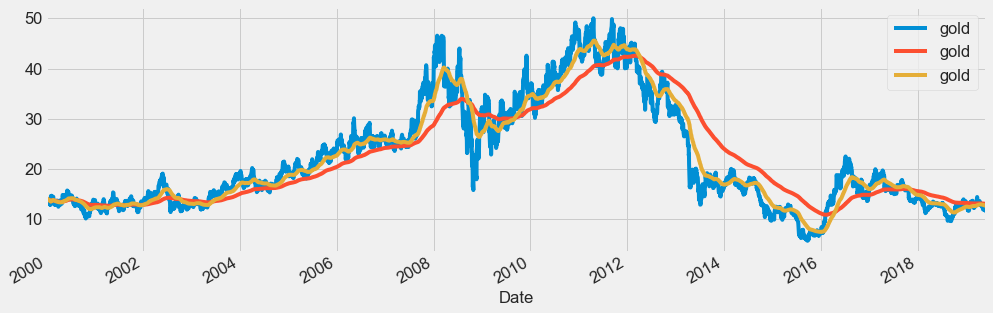

In [30]:
plot = bt.merge(data, ema200, ema50).plot(figsize=(15, 5))

C:\Users\Sarit\Anaconda3\envs\python\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0, 0.5, 'Probability')

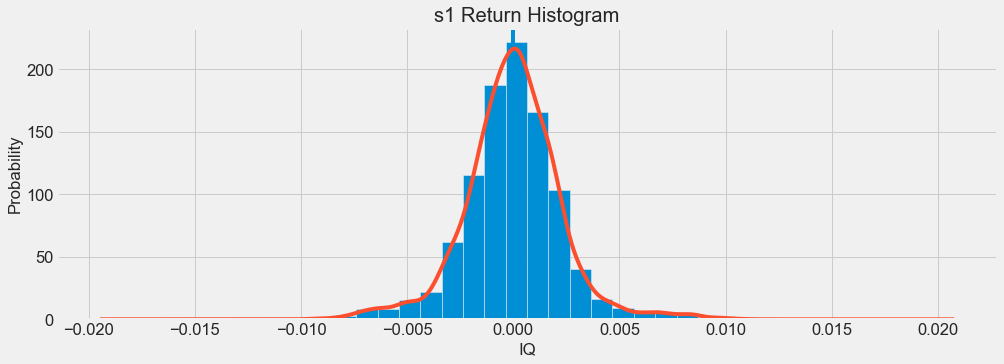

In [31]:
res2.plot_histogram()

plt.xlabel('IQ')  
plt.ylabel('Probability') 

In [33]:
## To calculate target weight dataframe copied the ema233 dataframe since the weights will have the same strucutre
tw = ema200.copy()

# setting appropriate target weights
tw[ema200 > ema50] = 1.0
tw[ema200 <= ema50] = -1.0

# The weight is set to 0 because ema200 needs 200 data points before
# calculating its first point. Therefore, it will start with a bunch of nulls (NaNs).
tw[ema200.isnull()] = 0.0

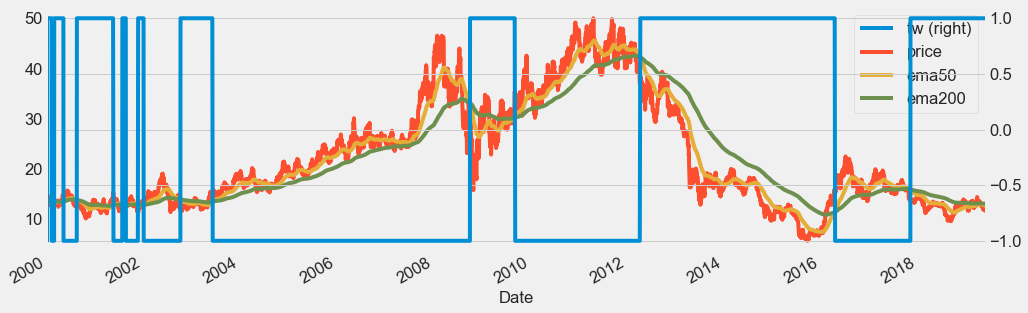

In [34]:
# plot the target weights + chart of original price & EMAs
tmp = bt.merge(tw, data, ema50, ema200)
tmp.columns = ['tw', 'price', 'ema50', 'ema200']
ax = tmp.plot(figsize=(15,5), secondary_y=['tw'])


In [35]:
tw.tail()

,gold
Date,
2019-05-24,1.0
2019-05-28,1.0
2019-05-29,1.0
2019-05-30,1.0
2019-05-31,1.0


##### This proves that backtest is similar in-line with ema crossover strategy. However, Monte-Calro simulation is performed to conduct the impact of risk and uncertainty.

### Monte-Carlo simulation

To set up the simulation, the expected level of return (mu) and volatility (vol) of the stock is estimated. Monte Carlo simulation randomly generates a large number of scenarios based on the probability of inputs.


In [2]:
df = pd.read_csv('Gold.csv', parse_dates= True, index_col=0)
df.head(2)

import math
from math import sqrt

#calculate the compound annual growth rate (CAGR) which will give us our mean return input (mu) 

days = (df.index[-1] - df.index[0]).days
cagr = ((((df['Adj Close'][-1]) / df['Adj Close'][1])) ** (252.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#create a series of percentage returns and calculate the annual volatility of returns

df['Returns'] = df['Adj Close'].pct_change()
vol = df['Returns'].std()*sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = -0.64%
Annual Volatility = 42.0%


###### CAGR on original price -0.64%  which is 'mu' here with added 42% volatilty which refelcts the range of price change Gold experienced since 2000. Bactest show CAGR -0.54%  on shorter window (50days) while  -0.39% on longer window (200days). 

###### Estimating Gold historical log returns. Applied  “percent change”  to obtain the simple returns from the dataset. With the formual added 1 + to extract simple return from the data. 

In [3]:
close_log = np.log(1+ df.Close.pct_change())
close_log.tail()

Date
2019-05-23    0.001674
2019-05-24   -0.000836
2019-05-28   -0.017729
2019-05-29    0.000851
2019-05-30    0.003398
Name: Close, dtype: float64

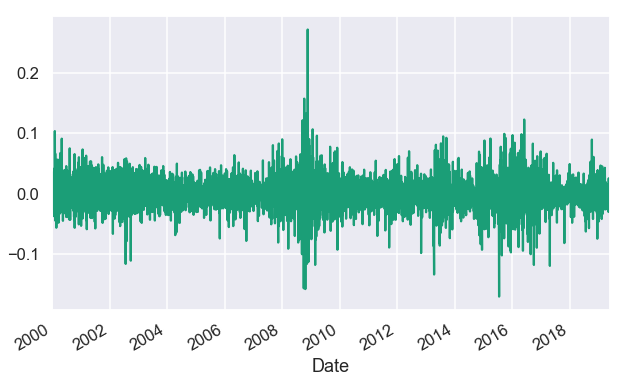

In [4]:
close_log.plot(figsize = (10, 6))

# Below plot tells us the returns are normally distributed and have a stable mean.

### simulation using Geometric Brownian Motion

Simulation was performed on original data series

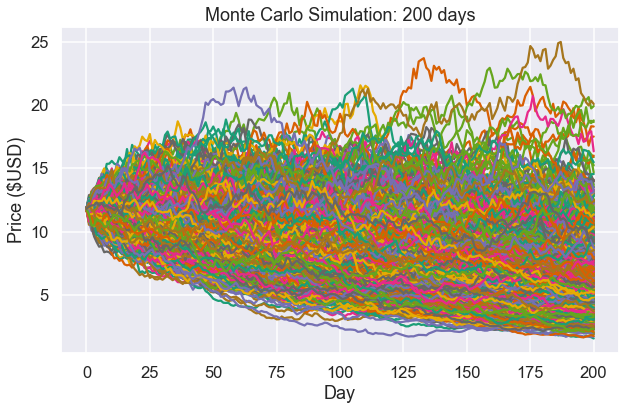

In [6]:
rcParams['figure.figsize']=10,6

#set up empty list to hold our ending values for each simulated price series
result = []

#Define Variables
S = df['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 200 # Number of trading days
mu = -0.64 #Return
vol = 0.42 #Volatility

# number of runs to simulate - I have chosen 1000
for i in range(1000):
    
    # create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
        
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
    
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)  #show the plot of multiple price series created above
    plt.xlabel('Day')
    plt.ylabel('Price ($USD)')
    plt.title ("Monte Carlo Simulation: 200 days")
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])

##### It can be seen that majority of the simulated paths are between $5 and $15

In [7]:
daily_returns

array([1.01539065, 1.00792853, 1.00164238, 1.01859663, 0.97962301,
       1.01697561, 0.97753209, 1.00765464, 0.98464071, 0.99503812,
       0.9881822 , 1.01919863, 0.95963925, 1.00940844, 1.07644522,
       1.01172734, 1.0358204 , 1.00642113, 1.02367564, 0.97374714,
       1.00486967, 1.01400904, 1.0348719 , 1.02003982, 1.00775059,
       0.99907299, 1.02410808, 1.00022147, 0.9922933 , 1.01534113,
       1.01081098, 1.03080705, 0.98125311, 0.95539083, 0.98519948,
       0.97197907, 0.99238934, 1.062643  , 0.98702915, 0.9509976 ,
       0.97011088, 0.99779011, 0.97703455, 0.96928478, 0.9424807 ,
       0.98639936, 0.99798206, 1.01473007, 1.03806222, 0.97506536,
       1.03008377, 0.97947016, 0.99934596, 1.00263687, 0.97928188,
       1.02166687, 1.01845441, 1.03883614, 1.02454771, 0.96819328,
       1.04473932, 0.99009213, 1.00743086, 1.0559866 , 0.93840953,
       1.00420105, 0.96460507, 0.98402474, 0.95480813, 1.02527715,
       0.95646991, 0.97875329, 1.04358823, 0.98581627, 1.04413

In [10]:
df['Adj Close'].describe()

count    4883.000000
mean       22.105161
std        10.594183
min         5.744994
25%        13.537093
50%        17.886133
75%        29.656831
max        49.995968
Name: Adj Close, dtype: float64

Text(0.5, 1.0, 'Line plot: 200 days')

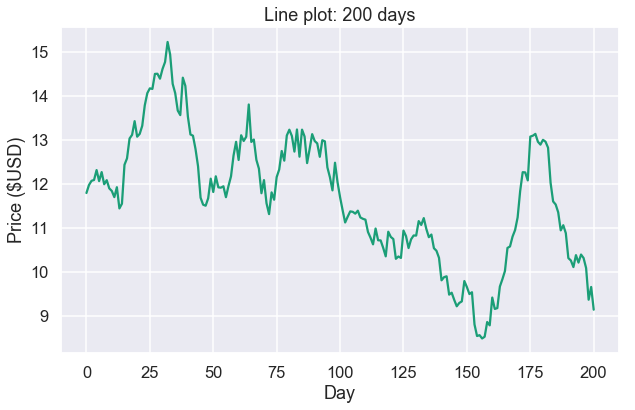

In [11]:
#Generating Plots - Simulated price series
plt.plot(price_list)
plt.xlabel('Day')
plt.ylabel('Price ($USD)')
plt.title ("Line plot: 200 days")

In [12]:
# calculating the mean of distribution to get the “expected value”
print(round(np.mean(price_list),2))

11.69


##### This is slightly different result due to the fact that these are simulations of random daily return draws. With more run in each simulation, the more the mean value will tend towards the mean return used as  “mu” input. This is as a result of the law of large numbers.

In [13]:
# Checking “quantiles” of the potential price distribution, to get an idea of the likelihood of very high or very low returns.

print("5% quantile =",np.percentile(price_list,5))
print("95% quantile =",np.percentile(price_list,95))

5% quantile = 9.218936038186124
95% quantile = 14.165395466479001


In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700,NaN
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900,0.000000
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100,-0.014134
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100,0.017921
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300,0.000000


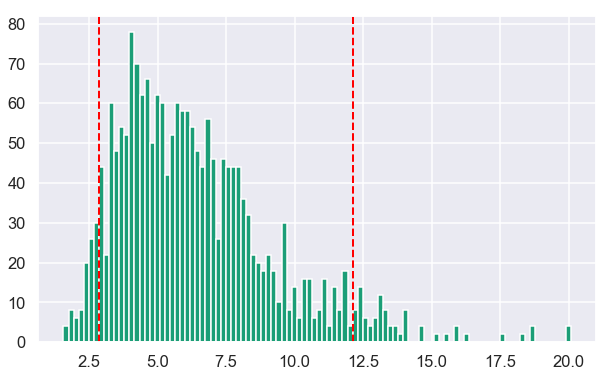

In [15]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)

# Historical volatility

Volatility is measured by the StdDev of returns for Gold. 
Historic volatility is derived from time series of past price data, whereas, an implied volatility is derived using the market price of a traded derivative instrument like an options contract.
Similar like before, used the logarithm to compute the logarithmic returns using closing price and then used the moving average and square root to compute the annualized volatility. Window of 252 trading days has been considered. Each of the days in the selected lookback period is assigned an equal weight. 

             Open   High    Low  Close  Adj Close    Volume  close_log  \
Date                                                                     
2019-05-09  12.60  12.71  12.36  12.37  12.327889  10320100  -0.016039   
2019-05-10  12.41  12.46  12.00  12.00  11.959148  14267000  -0.030368   
2019-05-13  12.12  12.34  12.02  12.31  12.268094  14893700   0.025505   
2019-05-14  12.27  12.53  12.19  12.46  12.417583  12208100   0.012112   
2019-05-15  12.56  12.62  12.40  12.50  12.457447  11132600   0.003205   
2019-05-16  12.42  12.43  12.11  12.18  12.138536  13565900  -0.025933   
2019-05-17  12.10  12.27  12.01  12.22  12.178400  11471500   0.003279   
2019-05-20  12.20  12.36  12.15  12.20  12.158468   6608300  -0.001638   
2019-05-21  12.13  12.17  11.92  12.12  12.078740  11404500  -0.006579   
2019-05-22  12.16  12.17  11.82  11.94  11.899353  12847100  -0.014963   
2019-05-23  12.02  12.24  11.96  11.96  11.919285  13787100   0.001674   
2019-05-24  12.00  12.00  11.75  11.95

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9E6042860>,
      dtype=object)

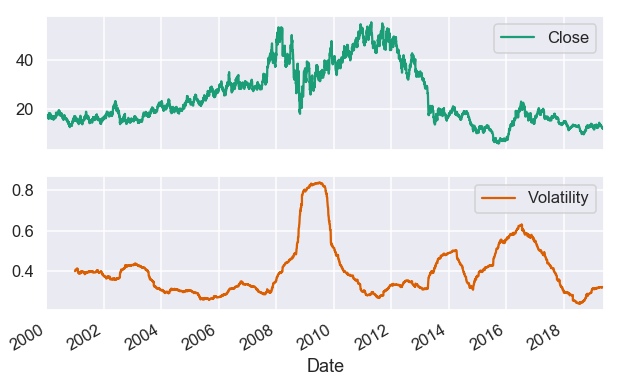

In [16]:
import seaborn as sns

df = pd.read_csv('Gold.csv', parse_dates= True, index_col=0)

# Compute the logarithmic returns using the Closing price 
df['close_log'] = np.log(df['Close'] / df['Close'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
df['Volatility'] = (df['close_log'].rolling(window=252).std()) * np.sqrt(252)
print(df.tail(15))

# Plot the Gold Price series and the Volatility
df[['Close', 'Volatility']].plot(subplots=True)

# Chaikin volatility

Chaikin's Volatility indicator determines volatility by applying an exponential moving average to the spread between the high and low prices.

A sharp increase in volatility in an upward trend could indicate a market top and a sharp increase in volatility in a downward trend could indicate a market bottom.

Volatility fluctuating around zero indicates that the price movement is relatively stable.

Calculation

1. EMA = EMA(High - Low)
2. CV = [(EMA - (EMA - 10) / (EMA -10)] * 100

In [21]:
df = pd.read_csv('Gold.csv', parse_dates= True, index_col=0)
df['ema'] = df['Close'].ewm(span =200, min_periods =0, adjust = True).mean()
HLavg = df['ema'] * (df['High']- df['Low'])

Volatility = [HLavg - (HLavg -10)  / (HLavg-10) ] * 100

In [22]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,ema
Date,,,,,,,
2019-05-23,12.02,12.24,11.96,11.96,11.919285,13787100,12.837523
2019-05-24,12.00,12.00,11.75,11.95,11.909319,11025500,12.828692
2019-05-28,11.70,11.85,11.65,11.74,11.700034,10656200,12.817860
2019-05-29,11.73,11.97,11.73,11.75,11.710000,11073100,12.807234
2019-05-30,11.76,11.87,11.66,11.79,11.790000,9272600,12.797112


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9E8A7B630>,
      dtype=object)

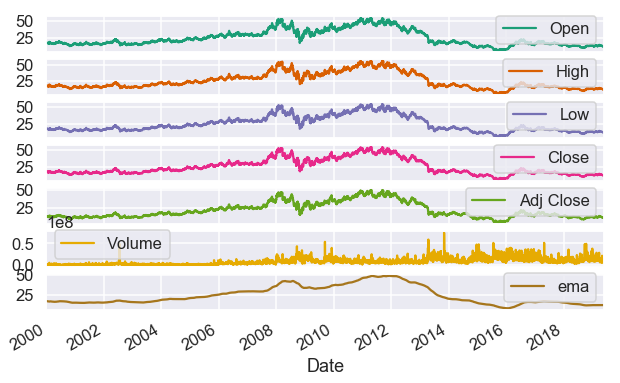

In [23]:
df.plot(subplots=True)

#### Volatility 32% is similar to Daily Sortino from back test and Monte-Carlo simulation.